# Naive Bayes-Klassifikatoren
Klassifikator, der auf bedingten Wahrscheinlichkeiten und dem Satz von Bayes beruht.

## Skalen-Niveaus

* Nominalskalen
* Ordinalskalen
* Intervalskalen
* Kardinalskalen

## Bedingte Wahrscheinlichkeiten


* Begriffe: Ergebnisraum $\Omega$
* Ergebnisse $\in\Omega$
* Ereignisse $\subset\Omega$
* $P(A\mid B)$ Wahrscheinlichkeit für $A$ unter der Voraussetzung $B$
* $P(A\mid B) = \frac{P(A\cap B)}{P(B)}$

## Satz von Bayes

$ P(A\mid B) = P(B\mid A) \cdot \frac{P(A)}{P(B)} $

## Naive Bayes Klassifikatoren für kategorische Features

* An Hand eines Feature-Vektors $\vec x$ für ein Objekt wird diejenige Klasse $i$ bestimmt, für die $P(i\mid\vec x)$ maximal ist.
* Aus einem Datensatz werden die Wahrscheinlichkeiten $P(x_k \mid i)$ bestimmt mit Häufigkeiten.
* Annahme (naiv): Die Features sind unabhängig (über $i$), also gilt der Multiplikationssatz:
  $P(\vec x\mid i) = P(x_1\dots x_m\mid i) = P(x_1\mid i)\cdots  P(x_m\mid i)$
* $P(i\mid \vec x) = P(\vec x \mid i) \cdot \frac{P(i)}{P(\vec x)} = P(x_1\mid i)\cdots  P(x_m\mid i) \cdot \frac{P(i)}{P(\vec x)}$
* Naiver Bayes-Klassifikator: Gesuchte Klasse ist
  $\mathop{argmax}_{i} P(i\mid \vec x) = \mathop{argmax}_{i} P(x_1\mid i)\cdots  P(x_m\mid i) \cdot \frac{P(i)}{P(\vec x)} = \mathop{argmax}_{i} P(x_1\mid i)\cdots  P(x_m\mid i) \cdot P(i)$

Falls eine Wahrscheinlichkeit $P(x_k=\ell,i_0)$ Null ist, bedeutet das, dass der Klassifikator nie $i_0$ als Klasse zurückgibt, sobald die $k$-te Komponente von $\vec x$ gleich $\ell$ ist. Dass $P(x_k=\ell,i_0)=0$ gilt, kann aber einfach daran liegen, dass in den Testdaten zufälligerweise kein Objekt in der Klasse $i_0$ liegt mit $x_k=\ell$.

Um dem entgegenzusteuern, wird ein bei den Berechnungen von $P(x_m\mid i)$ der Zähler um $\frac{1}{\mathsf{AnzahlFeature}}$ und der Nenner um 1 erhöht.

### Konkreter Datensatz
Daten laden von <http://archive.ics.uci.edu/ml/datasets/Acute+Inflammations>
### Bedeutung der Spalten

1. Temperatur des Patienten in Grad Celsius
2. Auftreten von Übelkeit (Bool)
3. Lendenschmerzen (Bool)
4. Urinschub (kontinuierlicher Bedarf Wasser zu lassen) (Bool)
5. Blasenschmerzen (Bool)
6. Beschwerden an der Harnröhre wie Juckreizo der Schwellung des Harnröhrenaustritts (Bool)
7. Krankheitsbild Harnblasenentzündung (Bool)
8. Krankheitsbild Nierenentzündung mit Ursprung im Nierenbecken (Bool)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("diagnosis.data",'r', encoding="utf16") as fFloat:
    with open("diagnosis.csv","w") as fString:
        for line in fFloat:
            line = line.replace(',', '.')
            line = line.replace('\t', ',')
            line = line.replace('yes', '1')
            line = line.replace('no', '0')
            line = line.replace('\r\n', '\n')
            fString.write(line)

In [3]:
dataset = np.loadtxt("diagnosis.csv", delimiter=',')

In [4]:
dataset

array([[35.5,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [35.9,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [35.9,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36. ,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.2,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.2,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.3,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.6,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.6,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.6,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.6,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.7,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.7,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.7,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [36.8,  0. ,  0. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [36.8,  0. ,  0. ,  1. ,

## Train-Test-Split

* Für ein Training eines Klassifikators mit Daten müssen die Daten in Trainings und Testdaten aufgespaltet werden
* Testdaten sollten weggesperrt werden und erst am Schluss zur Überprüfung des Klassifikators verwendet werden.
* Falls ein Klassifikator Parameter benötigt und diese Parameter experimentell bestimmt werden sollten, müssen die Testdaten in eigentliche Testdaten und Validierungsdaten aufgespaltet werden.
* Übliche Größe für Testdaten: 15 % - 30 %
* Die Auswahl der Testdaten sollte zufällig sein.

<table>
<tr><td colspan="2"> Trainingsdaten </td> <td rowspan="2"> Testdaten</td></tr>
<tr><td> Trainingsdaten </td> <td> Validierungsdaten </td> </tr>
</table>

### Illustration für Notwendigkeit von Daten für polynomiale Regression

(-300.0, 400.0)

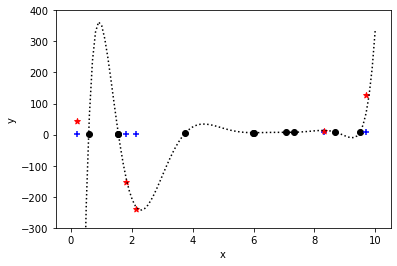

In [5]:
from scipy.interpolate import lagrange
np.random.seed(42)
x = 10*np.random.rand(15)
y = x + 0.5*np.random.rand(15)
p = lagrange(x[0:10],y[0:10])
xp = np.linspace(0,10,100)
yp = p(xp)
plt.scatter(x[0:10],y[0:10],c='k')
plt.scatter(x[10:15],y[10:15],c='b', marker='+')
plt.scatter(x[10:15],p(y[10:15]), c='r', marker='*')
plt.plot(xp,yp,'k:')
plt.xlabel('x'),plt.ylabel('y')
plt.ylim((-300, 400))

## Durchführung von Train-Test-Split

In [6]:
np.random.seed(42)

In [7]:
X = dataset[:,1:6] # ohne erste Spalte, da diese nicht kategorisch
Y = dataset[:,6]   # zweitletzte Spalte mit Klasse
allData = np.arange(X.shape[0])
iTesting = np.random.choice(X.shape[0],int(X.shape[0]*0.2),replace=False)
iTraining = np.delete(allData,iTesting)
dataRecords = len(iTraining)
XTrain = X[iTraining,:]
YTrain = Y[iTraining]

Aus den Test-Daten werden jetzt alle Wahrscheinlichkeiten $P(X_k=\ell\mid i)$ berechnet und in ein Numpy-Array `PXI[i, k, l]` gespeichert.

In [8]:
PXI = np.zeros((2, XTrain.shape[1], 2))
for k in range(XTrain.shape[1]):
    PXI[1, k, 1] = np.sum(XTrain[:,k] * YTrain)
    PXI[1, k, 0] = np.sum(XTrain[:,k] * (1 - YTrain))
    PXI[0, k, 1] = np.sum((1 - XTrain[:,k]) * YTrain)
    PXI[0, k, 0] = np.sum((1 - XTrain[:,k] ) * (1 - YTrain))

In [9]:
PXI

array([[[40., 31.],
        [ 8., 31.],
        [33.,  0.],
        [40.,  8.],
        [33., 24.]],

       [[ 9., 16.],
        [41., 16.],
        [16., 47.],
        [ 9., 39.],
        [16., 23.]]])

In [10]:
PI = np.zeros(2)
PI[1] = np.sum(YTrain)
PI[0] = dataRecords - PI[1]
PI

array([49., 47.])

In [19]:
def predictNaiveBayesNominal(x):
    P = np.zeros_like(PI)
    allofthem = np.arange(XTrain.shape[1])
    for i in range(len(PI)):
        P[i] = np.prod(PXI[i,allofthem,x])*PI[i]
    choosenClass = np.argmax(P)
    return choosenClass

Test des Klassifikators mit den Testdaten

In [20]:
XTest = X[iTesting,:]
YTest = Y[iTesting]
correct = np.zeros(2)
incorrect = np.zeros(2)
for i in range(XTest.shape[0]):
    klasse = predictNaiveBayesNominal(XTest[i,:].astype(int))
    if klasse == YTest[i]:
        correct[klasse] = correct[klasse] +1
    else:
        incorrect[klasse] = incorrect[klasse] +1
print(f"Von {XTest.shape[0]} Testfällen wurden {int(np.sum(correct))} richtig und {int(np.sum(incorrect))} falsch klassifiziert")

Von 24 Testfällen wurden 19 richtig und 5 falsch klassifiziert


## Nichtkategorische Features

* Annahme: Bei kardinalen Features sind die Werte für jede einzelne Klasse normalverteilt 
* Die Parameter der Verteilung (Erwartungswert $\mu$ und Standardabweichung $\sigma$ werden aus den Daten geschätzt.
* Wir ersetzten jetzt die bedingten ahrscheinlichkeiten durch die Wahrscheinlichkeitsdichten
$$ P(T\mid \mathsf{pos/neg Diagnose}) = \frac{1}{\sigma\cdot\sqrt{2\pi}} \cdot e^{-\tfrac12\left(\frac{T-\mu}\sigma\right)^2}$$

# Diskussion zu linearen Modellen und KNN
* Was ist lazy Learning
* Wozu Metriken
* Fluch der Dimension
* KNN

## Scikit Learn

* Scikit Learn ist eine Bibliothek für Machine-Learning Algorithmen.
* Test-Train-Split findet man unter https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* Ein naiver Bayes Klassifikator ist unter https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
* Beispiel-Datensätze (zum Spielen) gib's unter https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets


## Interface für Klassifikatoren in Scikit Learn
* Alle Klassifikatoren in Scitit Learn besitzen das gleiche Interface
* Einen Konstruktor
    * Bei GaussianNB ohne Parameter
    * Bei knn wird hier das k angegeben
* Eine Methode `fit(X, y)` zum Tainieren des Klassifikators
* Eine Methode `predict(X)` zum Anwenden des Klassifikators
* Eine Methode `score(X, y)` zum Überprüfen der Accuracy

## Aufgaben
1. Ladet einige Test-Datensätze, z.B. Iris oder Digits
2. Verwendet die in SKlearn eingebaute Funktion train\_test\_split zum Aufspalten von Datesätzen
3. Testet den GaussianNB Klassifikator und KNN aus
4. Implementiere eine Klasse für einen naiven Bayes-Klassifikator mit den folgenden Funktonalitäten:
   * Konstruktor
   * fit-Methode
   * predict-Methode
   * score-Methode
   